# **Project: SMS Spam Classifier**

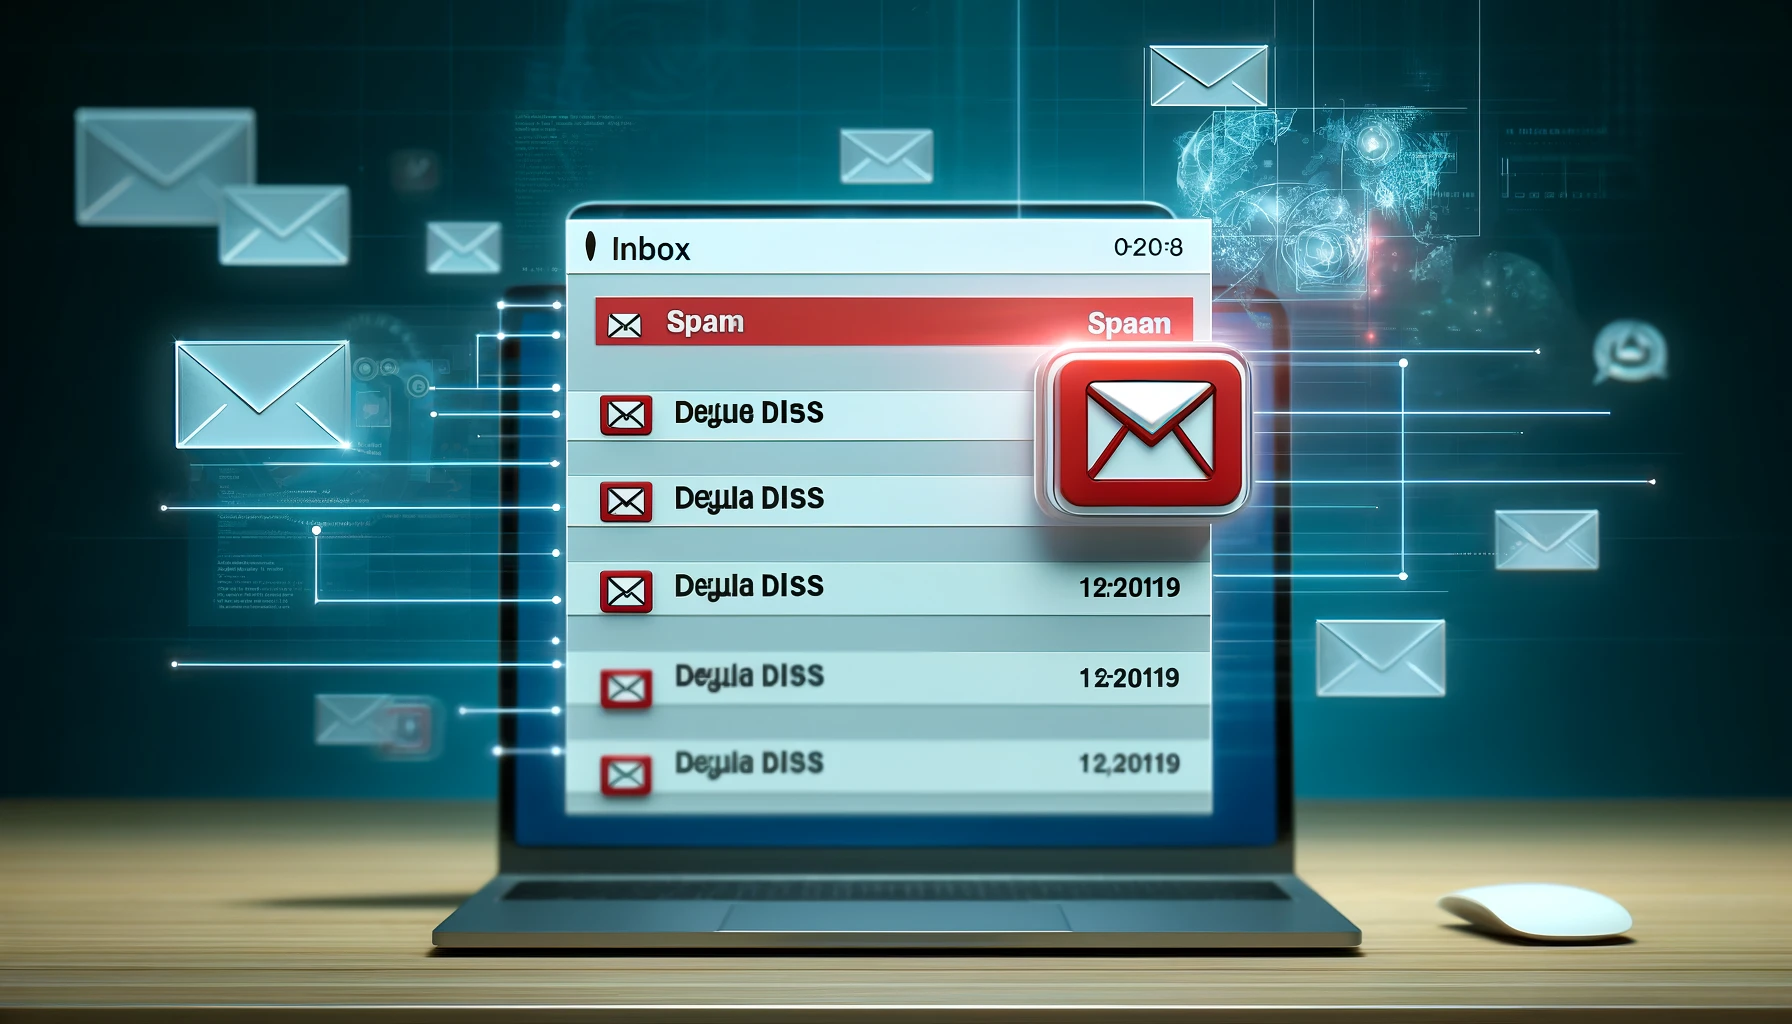

## Introduction

With the rapid increase in mobile phone usage, spam messages have become a significant problem for users worldwide. These unsolicited messages not only cause inconvenience but can also lead to financial scams and privacy breaches. The aim of this project is to develop a machine learning model to effectively classify SMS messages as either spam or legitimate (ham). By accurately identifying spam messages, we can help protect users from potential threats and improve their overall experience with mobile communication.

## Objective

The primary objective of this project is to build a robust and accurate spam classifier for SMS messages. This involves preprocessing the text data, handling class imbalance, and employing various machine learning algorithms to identify the best model for the task. We will also optimize the chosen model to enhance its performance further.

## Dataset Information

The SMS Spam Collection dataset is a publicly available dataset containing 5,574 SMS messages tagged as spam or ham. The dataset has been collected from various sources:

- 425 SMS spam messages from the Grumbletext website.
- 3,375 randomly chosen ham messages from the NUS SMS Corpus.
- 450 ham messages from Caroline Tag's PhD thesis.
- SMS Spam Corpus v.0.1 Big, which includes 1,002 ham messages and 322 spam messages.

The dataset contains two columns:

- v1: The label (ham or spam)
- v2: The raw text of the SMS message

## Research Question

Can we build a machine learning model that accurately classifies SMS messages as spam or ham using text data?

## Approach of Analysis

The analysis and modeling approach for this project consists of several steps:

**Data Loading and Preprocessing:**

- Load the dataset and remove duplicates.
- Preprocess the text data by converting it to lowercase, removing punctuation, and removing stopwords.

**Exploratory Data Analysis (EDA):**

- Visualize the distribution of spam and ham messages.
- Analyze the length of messages and generate word clouds for spam and ham messages.

**Feature Engineering:**

- Convert the text data into numerical features using TF-IDF vectorization.

**Handling Class Imbalance:**

- Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.

**Model Building and Evaluation:**

- Split the data into training and testing sets.
- Train and evaluate various machine learning models (Logistic Regression, Random Forest, SVC, Decision Tree, AdaBoost, Gradient Boosting, Naive Bayes) using cross-validation.
- Select the best model based on cross-validation scores.

**Hyperparameter Tuning:**

- Perform grid search to optimize the hyperparameters of the best model (Random Forest in this case).

**Model Evaluation:**

- Evaluate the final model on the test set and generate a classification report.

**Model Deployment:**

- Save the final model using pickle.
- Provide examples of how the model can be used to make predictions on new SMS messages.

## Imports

In [ ]:
!pip install -q opendatasets

In [ ]:
!pip install nltk

In [ ]:
import opendatasets as od
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Set plotting size and style
sns.set(rc = {'figure.figsize':(12, 8)})
sns.set_style("darkgrid")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Loading and Preprocessing

In [ ]:
# Import our dataset straight from kaggle
od.download("https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kostas696
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset


100%|██████████| 211k/211k [00:00<00:00, 45.7MB/s]

In [ ]:
# Load the dataset and convert the columns accordingly
spam_df = pd.read_csv('/content/sms-spam-collection-dataset/spam.csv', encoding='latin-1')
spam_df = spam_df[['v1', 'v2']]
spam_df.columns = ['label', 'message']
spam_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Check for null values
spam_df.isnull().sum()

label      0
message    0
dtype: int64

In [ ]:
# Check the general information of our dataset
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# Check for duplicates
spam_df.duplicated().sum()

403

In [ ]:
# Drop the duplicates
spam_df = spam_df.drop_duplicates()

In [ ]:
# Check if dropped
spam_df.duplicated().sum()

0

In [ ]:
# Preprocess the text in the message column
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

spam_df['clean_message'] = spam_df['message'].apply(preprocess_text)

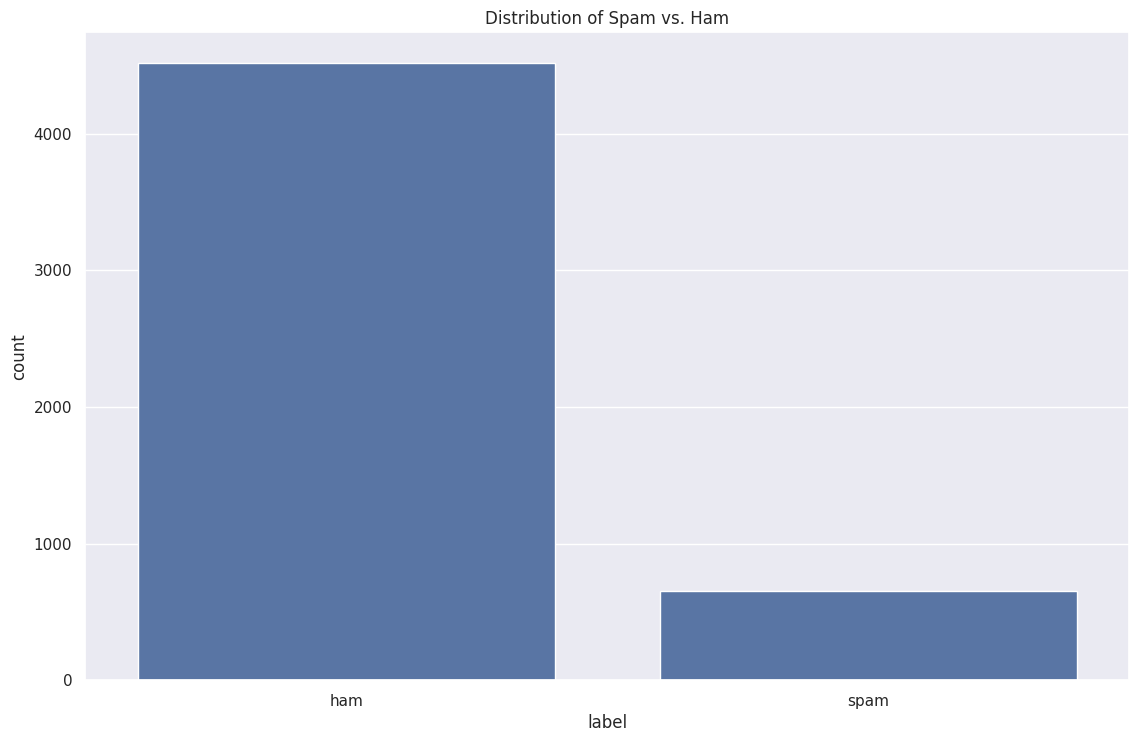

In [ ]:
# Check the distribution of the classes (Spam - Ham)
sns.countplot(x='label', data=spam_df)
plt.title('Distribution of Spam vs. Ham')
plt.show()

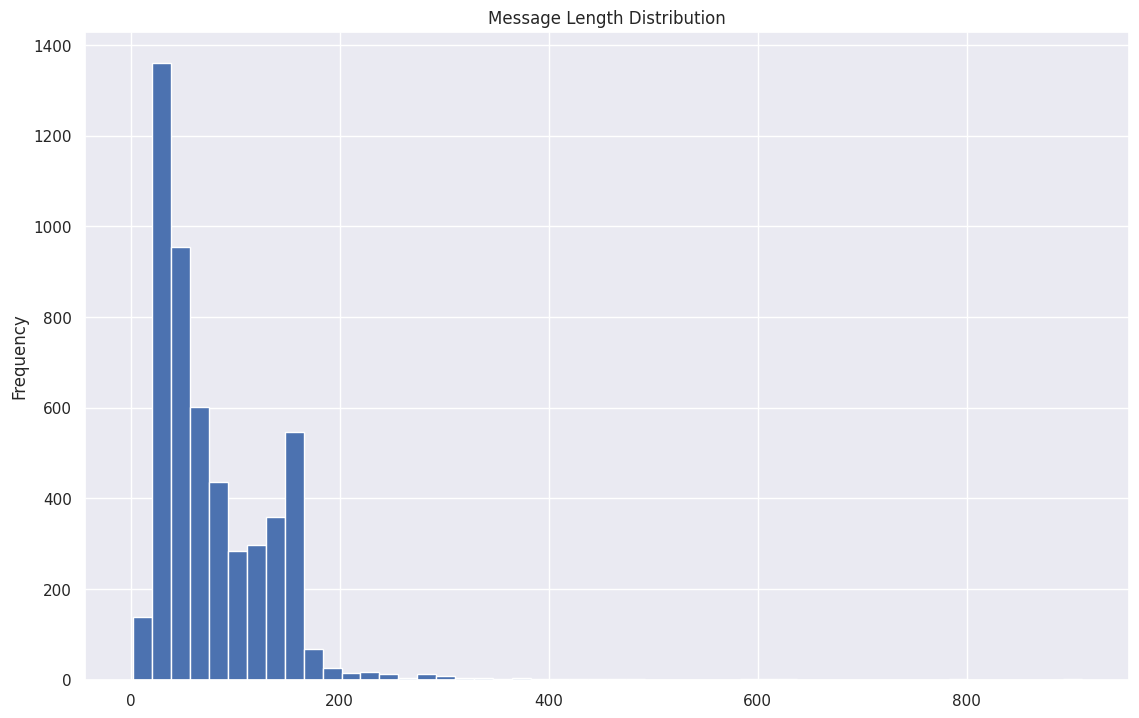

In [ ]:
# Plot the distribution of the length of each message in the new column
spam_df['message_length'] = spam_df['message'].apply(len)
spam_df['message_length'].plot(kind='hist', bins=50)
plt.title('Message Length Distribution')
plt.show()

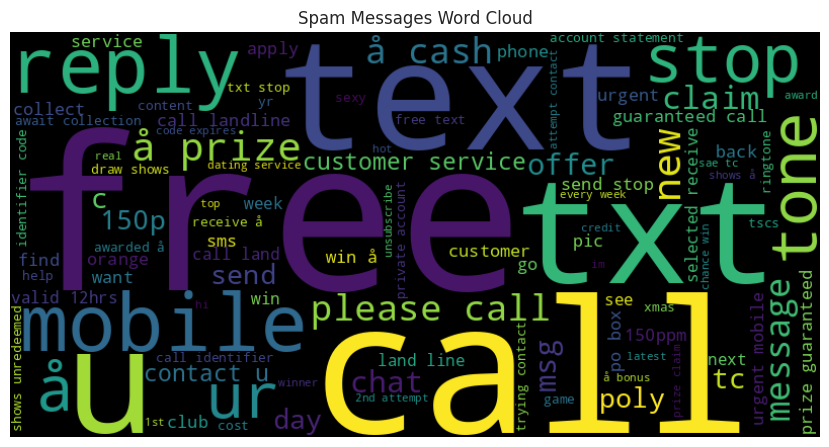

In [ ]:
# Create word clouds with the most popular words for spam
spam_words = ' '.join(list(spam_df[spam_df['label'] == 'spam']['clean_message']))
spam_wordcloud = WordCloud(width=800, height=400, max_words=100).generate(spam_words)

plt.figure(figsize=(10,5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')
plt.show()

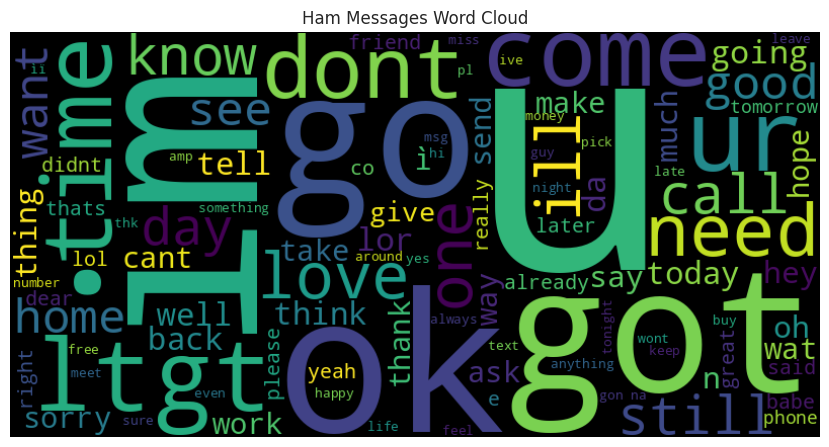

In [ ]:
# Create word clouds with the most popular words for ham
ham_words = ' '.join(list(spam_df[spam_df['label'] == 'ham']['clean_message']))
ham_wordcloud = WordCloud(width=800, height=400, max_words=100).generate(ham_words)
plt.figure(figsize=(10,5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')
plt.show()

## Feature Engineering

In [ ]:
# Convert the text data into numerical features using TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(spam_df['clean_message']).toarray()
y = spam_df['label'].map({'ham': 0, 'spam': 1}).values

## Model Building and Evaluation

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(7254, 3000)
(7254,)


In [ ]:
# Train various machine learning models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Naive Bayes': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

In [ ]:
# Evaluate models using cross-validation
best_model_name = None
best_score = 0
model_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
    model_scores[name] = scores.mean()
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_model_name = name

print("Model scores:", model_scores)
print(f"Best model: {best_model_name} with score: {best_score}")

Model scores: {'Logistic Regression': 0.9510611944200196, 'Random Forest': 0.992969414672402, 'SVC': 0.9920047529646616, 'DecisionTreeClassifier': 0.9710504527198841, 'AdaBoostClassifier': 0.9662260985289575, 'GradientBoostingClassifier': 0.9494064973026924, 'Naive Bayes': 0.9707755412438509, 'BernoulliNB': 0.9775302645024834}
Best model: Random Forest with score: 0.992969414672402


## Hyperparameter Tuning:

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [2, 4]
}

# Instantiate the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'min_samples_leaf': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.985525606597115


## Model Evaluation

In [ ]:
# Train the final model with the best parameters
final_model = grid_search.best_estimator_
final_model.fit(X_train_smote, y_train_smote)

# Evaluate the final model on the test set
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.92      0.90      0.91       145

    accuracy                           0.97      1034
   macro avg       0.95      0.94      0.95      1034
weighted avg       0.97      0.97      0.97      1034



In [ ]:
# Save the final model to a file using pickle
with open('final_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

## Model Deployment

In [ ]:
# Example inferences
example_emails = ["Don't forget our meeting tommorow at 10:00. Don't be late!", "Congratulations! You have won 1,000,000. Claim your prize now!"]
example_vectors = tfidf.transform(example_emails).toarray()
predictions = final_model.predict(example_vectors)

for email, prediction in zip(example_emails, predictions):
    print(f"Email: {email}\nPrediction: {'Spam' if prediction == 1 else 'Legitimate'}\n")

Email: Don't forget our meeting tommorow at 10:00. Don't be late!
Prediction: Legitimate

Email: Congratulations! You have won 1,000,000. Claim your prize now!
Prediction: Spam

